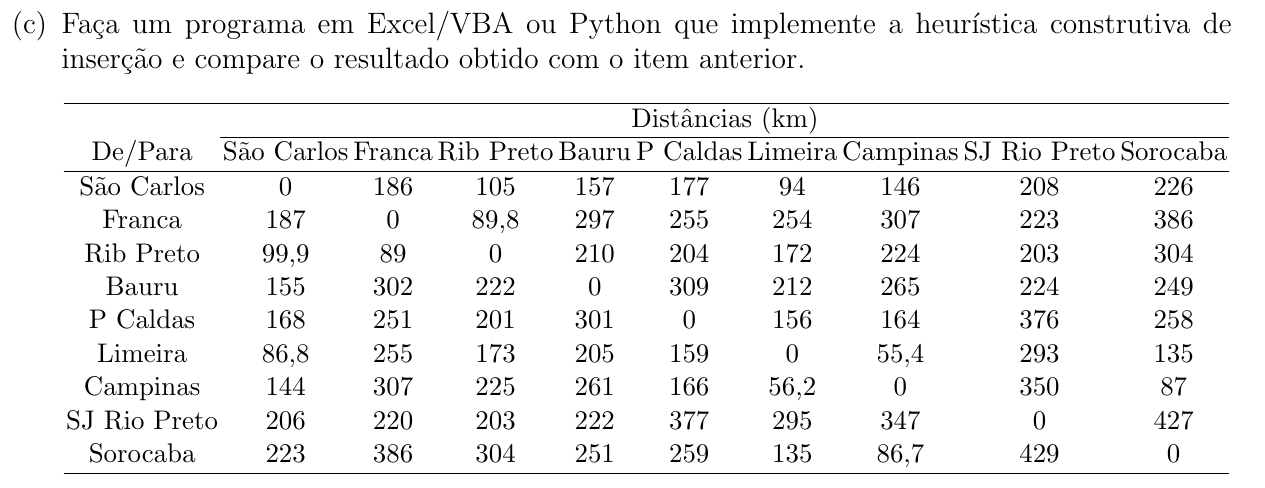

In [2]:
from IPython.display import Image
Image(filename='images/2c.png')

In [13]:
# Bibliotecas
import xlwings as xw
import pandas as pd

In [14]:
# Planilha
wb = xw.Book('dados_1.xlsx')
sheet = wb.sheets['Plan2']

# Dados
Cidades = [int(c) for c in sheet.range('C2:K2').value]
distancia = sheet.range('B2:K11').options(pd.DataFrame).value.stack().to_dict()

In [15]:
# 1. Inicializa a rota inicial, k é a cidade mais distante de 3
u = 0
for i in Cidades:
    if i != 3:
        if distancia[i, 3] > u:
            k = i
            u = distancia[i, 3]

rota = [3, k, 3]

In [16]:
# 2. Inicializa contador de distâncias
d = distancia[3, k] + distancia[k, 3]

In [17]:
while sum(rota) - rota[-1] != sum(Cidades):
    # 3. Encontrar nó j mais distante da rota que ainda não foi visitado
    s = {}
    temp = []
    for n in Cidades:
        if n not in rota:
            for c in rota:
                temp.append(distancia[n, c])
            s[n] = min(temp)
            temp = []
            
    j = max(s, key=s.get)
    
    # 4. Obter dois nós i e k na rota para inserir j entre eles
    s = {}
    pares = []
    for posicao, n in enumerate(rota):
        i = n
        if posicao + 1 < len(rota):
            k = rota[posicao + 1]
            pares.append((posicao, posicao + 1))
            s[pares[-1]] = distancia[i, j] + distancia[j, k] - distancia[i, k] 

    p = min(s, key=s.get)
    
    # 5. Atualização da distância
    d += distancia[rota[p[0]], j] + distancia[j, rota[p[1]]] - distancia[rota[p[0]], rota[p[1]]]
    
    # 6. Inserção de j à rota entre os nós i e k
    rota.insert(p[1], j)
    
    # 7. repete enquanto todas as cidades não forem percorridas

In [18]:
rota

[3, 2, 8, 4, 9, 7, 6, 5, 1, 3]

In [19]:
d

1357.9